In [1]:
# Add relevant Jupyter notebook extensions 

In [2]:
# You can double-check your Python path like this...
import sys  
sys.path.append('..')

# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

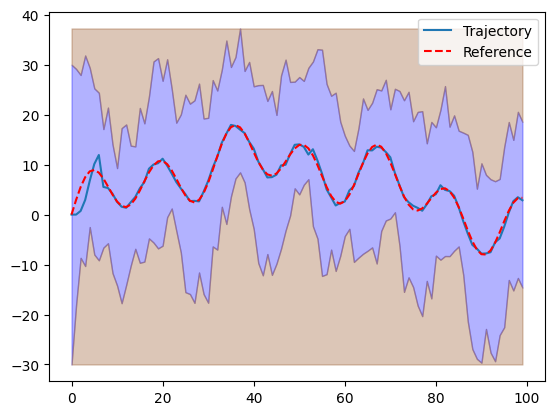

In [18]:
from uuv_mission.dynamic import *
from uuv_mission.control import *

sub = Submarine()
controller = HMPCController()
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("../data/mission.csv")

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)